In [150]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
from brian2.units import *
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML

In [151]:
data = np.load("../../synaptogenesis/structural_results_stdp_101549_04062017.npz")

In [152]:
data

In [153]:
simtime = int(data['simtime'])

In [154]:
pre_spikes = data['pre_spikes']
post_spikes = data['post_spikes']
ff_projection_w= data['ff_projection_w']
lat_projection_w= data['lat_projection_w']

In [155]:
pre_spikes = pre_spikes[:, :].astype(dtype=np.int32)
post_spikes = post_spikes[:, :].astype(dtype=np.int32)

In [156]:
pre_spikes_times = np.zeros((16,16,simtime))
post_spikes_times = np.zeros((16,16,simtime))

In [157]:
for id, time in pre_spikes:
    pre_spikes_times[id/16, id%16, time] = 1
for id, time in post_spikes:
    post_spikes_times[id/16, id%16, time] = 1    

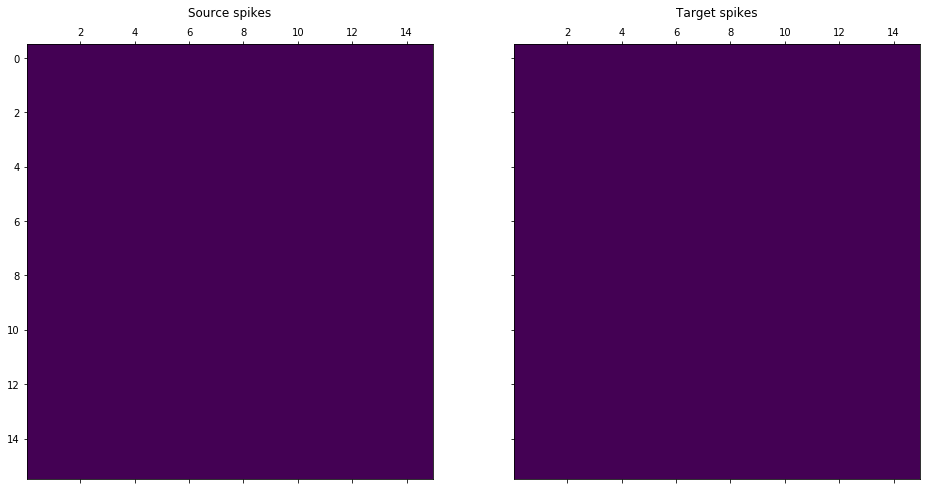

In [158]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    
pre_image = np.zeros((16,16))
post_image = np.zeros((16,16))
source_ax = ax1.matshow(pre_image, vmin=0, vmax=110)
target_ax = ax2.matshow(post_image, vmin=0, vmax=140)

ax1.set_title("Source spikes")
ax2.set_title("Target spikes")

In [159]:
def init():
    global pre_image, post_image
#     line.set_data(input_rates/Hz)
    source_ax.set_data(np.zeros((16,16)))
    target_ax.set_data(np.zeros((16,16)))
    pre_image = np.zeros((16,16))
    post_image = np.zeros((16,16))
    return (source_ax, target_ax, )

In [160]:
def animate(i):
    global pre_image, post_image, pre_spikes_times, post_spikes_times

    
    pre_image += pre_spikes_times[0:16, 0:16, i] * 100
    post_image += post_spikes_times[0:16, 0:16, i] * 100
            
    source_ax.set_data(pre_image)
    target_ax.set_data(post_image)
    pre_image *= .8
    post_image *= .8
    return (source_ax,target_ax,)

In [70]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=simtime, interval=60, blit=True)

In [56]:
HTML(anim.to_html5_video())

In [57]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=24, metadata=dict(artist='Petrut A Bogdan'), bitrate=-1)

In [58]:
anim.save('stationary_input_fixed_rate_256.mp4', writer=writer)

TODO 

Analyse whether most spikes happen around the area of the input (0, 10) and less in the centre

Run experiment with 256 poisson spikes (more in centre, less on the edge

Plot weight changes over time (256x256 matrix)

Reduce fps when saving files

In [161]:
# Where are spikes happening most often?
post_count = np.zeros((16,16))
post_count = np.count_nonzero(post_spikes_times[0:16, 0:16, :], axis=2)

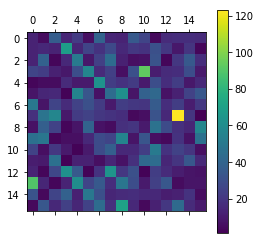

In [162]:
plt.matshow(post_count, fignum=180)
plt.grid(visible=False)
plt.colorbar()

In [163]:
ff_projection_w.shape

(6613, 4)

Huh, that's a weird shape and number ... It also doesn't tell me which synapses the weights are for

In [164]:
# an all to all connectivity would have
no_syn = (256 * 255)//2
print no_syn, "synapses"

32640 synapses


In [165]:
# Thus our connectivity is about 
print (ff_projection_w.shape[0] * 100.) / no_syn, "%"

20.2604166667 %


Can I have nicer Poisson rates for SpiNNaker?

In [166]:
connectivity_matrix = np.zeros((256,256))

In [168]:
for source, target, weight, delay in ff_projection_w:
    assert delay==1
    connectivity_matrix[int(source),int(target)] = weight

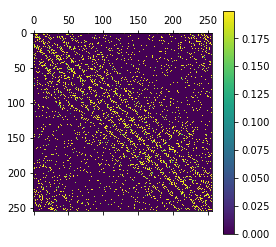

In [169]:
plt.matshow(connectivity_matrix, fignum=180)
plt.grid(visible=False)
plt.colorbar()

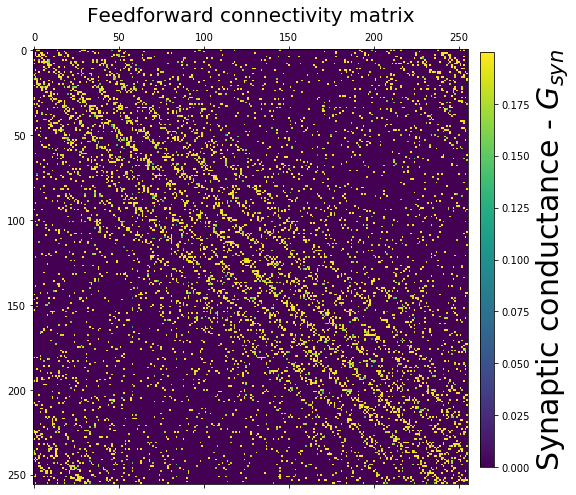

In [170]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(connectivity_matrix)
ax1.grid(visible=False)
ax1.set_title("Feedforward connectivity matrix", fontsize=20)
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=30)

In [ ]:
np.max(connectivity_matrix)

In [ ]:
np.count_nonzero(np.sum(connectivity_matrix, axis=0))

In [ ]:
np.ndenumerate(range(5), range(10))